In [1]:
import os, sys
projectDir = os.path.abspath('..')
if not projectDir in sys.path: sys.path.append(projectDir)
import matplotlib.pyplot as plt
import numpy as np
import scipy
import bspy

# The $n$-body equations are a 2nd order system of ODEs

$$m_ix_i'' = \sum_{j\ne i}f_{ij}(x_j-x_i)/r_{ij},\qquad i=1,...,n$$

where

$$f_{ij}={Gm_im_j\over r_{ij}^2},\qquad\hbox{with } r_{ij}=\|x_i-x_j\|$$

With the masses given in kilograms and the distances in kilometers, the appropriate value of $G$ is

$$G=8.6443\times 10^{-13}{\hbox{km}^3\over\hbox{hour}^2\hbox{kg}}$$

This can be rewritten in a simpler form

$$x_i'' = \sum_{j\ne i}g_{ij}(x_j-x_i),\qquad i = 1, ..., n$$

where

$$g_{ij}={Gm_j\over r_{ij}^3},\qquad\hbox{with } r_{ij}=\|x_i-x_j\|$$

In [2]:
def nBodyF(t, u, nBody, nDim, mass):
    G = 8.6443e-13
    nState = nDim * nBody
    rhs = np.zeros((nState,))
    jacobian = np.zeros((nState, nState, 2))
    for iBody in range(nBody):
        bodySlice = slice(iBody * nDim, (iBody + 1) * nDim)
        for iTerm in range(nBody):
            if iBody == iTerm:
                continue
            termSlice = slice(iTerm * nDim, (iTerm + 1) * nDim)
            direction_ij = u[termSlice, 0] - u[bodySlice, 0]
            rij = (direction_ij @ direction_ij) ** 0.5
            gij = G * mass[iTerm] / rij ** 3
            gijPrime = 3.0 * gij / rij ** 2
            rhs[bodySlice] += gij * direction_ij
            jacobian[bodySlice, bodySlice, 0] -= gij * np.identity(nDim)
            jacobian[bodySlice, termSlice, 0] += gij * np.identity(nDim)
            jacobian[bodySlice, bodySlice, 0] += gijPrime * direction_ij * direction_ij
            jacobian[bodySlice, termSlice, 0] -= gijPrime * direction_ij * direction_ij
    return rhs, jacobian

In [3]:
nBody = 2
nDim = 1
mass = np.array([3.0e+19, 1.0e+19])
finalTime = 4.0
mass = np.array([3.0e+19, 1.0e+19])
u = [0.0, 0.0, finalTime, finalTime]
data = np.array([[100.0, 900.0], [0.0, 0.0],
                 [900.0, 100.0], [0.0, 0.0]]).T
initialGuess = bspy.Spline.least_squares(u, data)
solution = initialGuess.solve_ode(2, 0, nBodyF, 1.0e-4, (nBody, nDim, mass))

(60.000000000000014, 940.0, -0.05500000000000001, 0.05500000000000001)

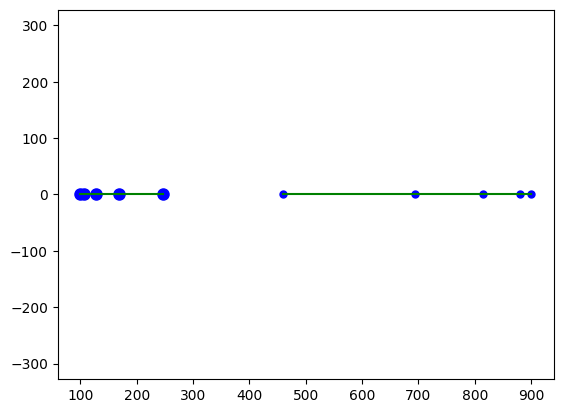

In [4]:
pValues = np.linspace(0.0, 4.0, 5)
tValues = np.linspace(pValues[0], pValues[-1], 101)
x1Points, x2Points = solution(pValues)
x1Values, x2Values = solution(tValues)
plt.plot(x1Points, np.zeros(len(x1Points)), 'b', marker = 'o', markersize = 8, linestyle = "")
plt.plot(x2Points, np.zeros(len(x2Points)), 'b', marker = 'o', markersize = 5, linestyle = "")
plt.plot(x1Values, np.zeros(len(x1Values)), 'g')
plt.plot(x2Values, np.zeros(len(x2Values)), 'g')
plt.axis('equal')

In [27]:
nBody = 2
nDim = 2
mass = np.array([3.0e+19, 1.0e+19])
finalTime = 20.0
mass = np.array([3.0e+19, 1.0e+19])
u = [0.0, 0.0, finalTime, finalTime]
data = np.array([[100.0, 0.0, 900.0, 900.0], [0.0, 100.0, 0.0, -100.0],
                 [900.0, 100.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]).T
initialGuess = bspy.Spline.least_squares(u, data)
solution = initialGuess.solve_ode(2, 0, nBodyF, 1.0e-4, (nBody, nDim, mass))

(-1115.0700423319952, 995.955716301524, -114.36639723111116, 2401.694341853334)

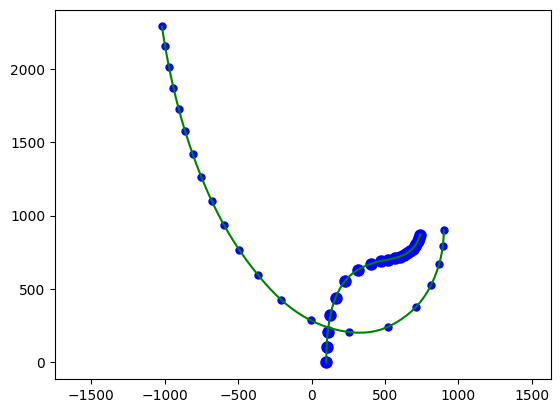

In [28]:
pValues = np.linspace(0.0, finalTime, int(finalTime) + 1)
tValues = np.linspace(pValues[0], pValues[-1], 101)
x1P, y1P, x2P, y2P = solution(pValues)
x1, y1, x2, y2 = solution(tValues)
plt.plot(x1P, y1P, 'b', marker = 'o', markersize = 8, linestyle = "")
plt.plot(x2P, y2P, 'b', marker = 'o', markersize = 5, linestyle = "")
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'g')
plt.axis('equal')